Alexandra Coffin:
Data Analytics:
2023/2/27:
Dr. Case:
Module 7

# Chapter 15: Machine Learning:
## Classification, Regression & Clustering
There are two main types of machine learning that are typcally taught, supervised machine learning, which works with labeled data, an unsupervised machine learning, which works with unlabeled data. The more phots the model is trained with, the greater the chance that the model will accuratly predict which new photos are the desired catagories. In this sectionw e will be exploring Scikit-learn and bundled datasets. 

# Imports

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import numpy as np

#### Note:
The simple filter 'ignore' was added to ignore a number of errors warning:

sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)

## Loading Dataset:

In [2]:
digits = load_digits()

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## Checking Sample & Target Size:

In [4]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [5]:
digits.data.shape

(1797, 64)

In [6]:
digits.target.shape

(1797,)

## Sample Digit Image:

In [7]:
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

In [8]:
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

In [9]:
digits.images[22]

array([[ 0.,  0.,  8., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  1., 13., 11., 16.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  0., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  3.,  1., 16.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0., 14., 15.,  8.,  8.,  3.,  0.],
       [ 0.,  0.,  7., 12., 12., 12., 13.,  1.]])

In [10]:
digits.target[22]

2

## 15.2.3: Visualizing the Data:
The idea is to get a sense of what the data actually looks like by displaying it. We are able to do matplotlib implot function to return subplots and axes objects in a two-dimensional NumPy array.

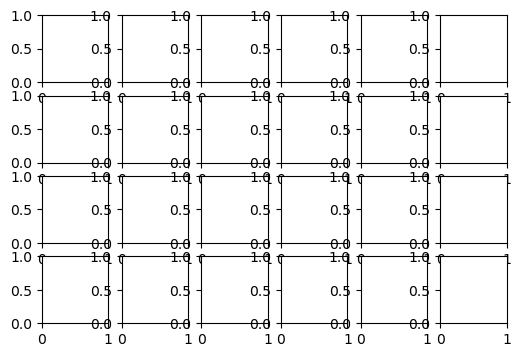

In [11]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6,4))

## Displaying Each Image & Removing the Axes Labels:
Using a for statment with a built in zip function to iterate in parallel through the 24 axes objects, the first 24 images in digits.images and the first 24 values in digits.target. NumPy array creates a one-dimensional view of a multidimensional array. Each tuple zip produces contains elements from the same index of each of zip's arguments and that argument with the fewest elements determines how many tuples zip returns. 

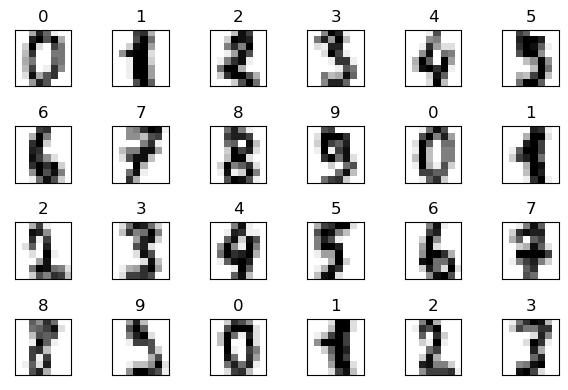

In [12]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6,4))

for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

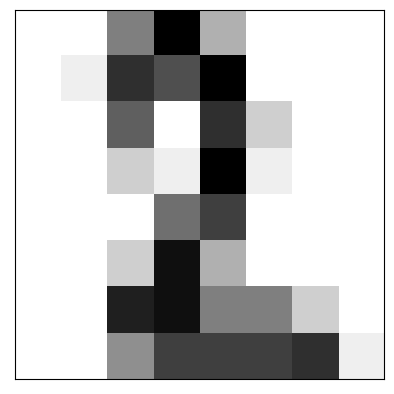

In [23]:
axes = plt.subplot()

image = plt.imshow(digits.images[22], cmap=plt.cm.gray_r)

xticks = axes.set_xticks([])

yticks = axes.set_yticks([])

##  15.2.4: Split Data for Training & Testing:
Typically training a machine-learning model with a subset of a dataset, the more data you have for trianing, the better. It is also important to set data aside for testin a swell, so that its possible to assess a model's performance using data that the model has not yet seen. This is why w create a training set and a testing set.

The train_test_split from the sklearn.model_selection module shuffles the data to randomize it, then splits the samples in the data array and the target values in the target array into training and testing sets.

The samples are divided evenly among classes, this is the ase for each scikit-learn's bundled classification datasets. 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11)

In [14]:
X_train.shape

(1347, 64)

In [25]:
X_test.shape

(450, 64)

##  15.2.5: Creating the Model & Training the Model: 
The KNeighborsClassifier estimator impliments the nearest neightbors algorithm. Then we use the fit method, which loads the sample training set (x_train) and target training set (y_train) into the estimator. The fit method loads the data into the estimator then uses that data to perform complex calculations behind the scenes that learn from the data and train the model. This method loads the data into the estimator because k-NN actually has no initial learning process. 

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [27]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

### 15.2.7: Predicting Digit Classes:
We then load the data into the KNeighborsClassifier we can use it with the test samples to make predictions. Calling the estimator's predict method with X_test as an argument returns an array containing the predicted class of each test image. 

The list wrong uses zip to create tuples containg the corresponding elements in predicted and expected. We include a tuple in the result only if its p and e differ, meaning the predicted value was incorrect. 

In [28]:
predicted = knn.predict(X=X_test)

In [29]:
expected = y_test

In [30]:
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [31]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [32]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [33]:
wrong

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

## 15.3: Case Study: Classified with k-Nearest Neightbors Pt. 2
### Metrics for Model Accuracy:

We can use estimator as a score method that returns an indication of how well the estimator performs for the test data you pass as arguments. For classification estimators, this method returns the prediction accuracy for the test data.

In [34]:
print(f'{knn.score(X_test, y_test):.2%}')

97.78%


The confusion matrixchecks a classification estimator's accuracy through a confusion matriz, which shows the correct and incrrect predicted values for a given class. The y_true keyword argument specifies the test samples' actual classes. People looked at the dataset's images an labeled them with specific classes. The y_pred keyword argument specifies the predicted digits for those test images. The confusion matriz produced by the call, the correct predictions are shown on the diagonal from the top - left to bottom -right. This is called the principal diagonal, the nonzero values that are not on the principal diagonal indicat incorrect predictions.

In [35]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [36]:
confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]], dtype=int64)

### Classification Report:
The module also provides function classification_report, which produces a table of classification metrics based on expected and predicte values. Precision is the total number of correct predictions given digit divided the total number of predictions of the digit.

The recall is the total number of correct predictions for a given digit divided by the total number of samples that should have been predicted as that digit.

f1-score, thsi is the average of the precision and the recall.

Support is the number of samples with a given expected value.

In [37]:
name = [str(digit) for digit in digits.target_names]

In [38]:
print(classification_report(expected, predicted, target_names=name))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



### Visualzing the Confusion Matrix:
The following heat map displays values as colors, oftenw ith values of higher magnitude displayed as more intense colors. This is using seaborn's graphing feature to more with two-dimensional data. Seaborn automatically labels its visualizations using the column names and row indicies. The heatmap creates a head map from the specified DataFrame. The keyword argument annot=True, displays the color bar to the right. When displaying confusion matrix as a heat map, the principal diagonal and the incorrect predictions stand out. 

In [39]:
import pandas as pd
import seaborn as sns

In [40]:
confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))

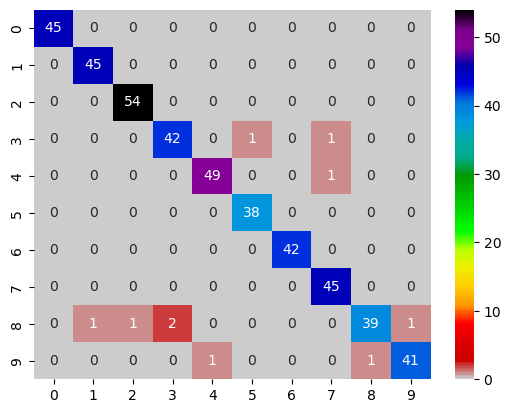

In [41]:
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

## 15.3.2: K-Folds:
K-fold cross validation enables the use of all data for both traing and testing, to get a better sense of how well the model will make preditions for new data by repeatedly training and testing the model with different portions of the dataset. This is done with 10 sucessive training and testing cycles:

    1. Train with folds 1-9, then test wight fold 10
    2. Train with folds 1-8 and 10, then test with fold 9
    3. we'd train with folds 1-7 and 9-10 then test with fold 8
Scikit-learn provides the KFold class and the cross_val_score function to help perform the training and testing cycles. This is when the k-fold cross validation with the Digits dataset and the KNeightborsClassifier created earlier. The keyword arguments are:
    
    * n_splits=10, which specifices the number of folds.
    * random_state=11, which seeds the random number generator for reproductibility.
    * shuffle=True, causes the KFold object to randomize the data by shuffling it before splitting it into folds. This is critical if the samples might be fordered or grouped.
### Using KFold Object with Function cross_val_score:
These keyword arguments are:

    * estimator=knn, which specifies the setimator you'd like to validate.
    * X=digits.data, which specifies the samples to use for training and testing.
    * y=digits.target, which specifies the target predicitons for the samples. 
    * cv=fold, which specifies the corss-validation generator that defines how to split the samples and targets for training and testing. 

In [42]:
from sklearn.model_selection import KFold

In [43]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

### KFold Objects with Function cross_val_score:

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)

In [46]:
scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98882682])

In [47]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 98.78%


In [48]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 0.74%


## 15.3.3: Running Multiple Models fo Find the Best One:
It's difficult to know in advance which machine learning model will perform best for given dataset, especially when they hide the details of how they operate from their users. Even though the KNeighborsClassifier predicts digital images with a high degree of accuracy, it's possible to that other scikit-learn estimators are even more accurate. 

In [49]:
from sklearn.svm import SVC

In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
estimators = {
    'KNeighborsClassifier': knn,
    'SVC': SVC(gamma='scale'),
    'GaussianNB': GaussianNB()}

Now exicuting the model.

In [52]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
                            X=digits.data, y=digits.target, cv=kfold)
    print(f'{estimator_name:>20}: ' +
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.78%; standard deviation=0.74%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%


The loop iterates through items in the estimators dictionary and for each key-value pair performs the following tests:

    a. Unpacks the key into estimator_name and value into estimator_object
    b. Creates a KFold object that shuffles the data and prodcues 10 folds. The keyword argument random_state is particularly important here because it ensures that each estimator works with identifcal folds.
    c. Evaluates the current estimator_object using cross_val_score.
    d. Prints the estimator's name, follwoed by the mean and standard deviation of the accuracy scores' computed for each of the 10 folds. 

## 15.3.4: Hyperparameter Turning:
Hyperparameters are set before using the algorithm to train the model. When applied in the real-world machine learning studeies, the hyperparameter tuning to choose hyperparemeter values that produce the best possible preditions. To determine the best value for k in the kNN algorithm, try different values of k then compare the estimaor's performance with each. The k value 1 in kNN produces the most accurate predictions for the Digits dataset. 

It is important to know your data dn know your roots. The examplecompute time grows rapidly with k, because k-NN needs to perform more calculations to find the nearest neighbors. 

In [53]:
for k in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn,
                            X=digits.data, y=digits.target, cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=98.83%; standard deviation=0.58%
k=3 ; mean accuracy=98.83%; standard deviation=0.72%
k=5 ; mean accuracy=98.78%; standard deviation=0.74%
k=7 ; mean accuracy=98.44%; standard deviation=0.96%
k=9 ; mean accuracy=98.39%; standard deviation=0.80%
k=11; mean accuracy=98.33%; standard deviation=0.90%
k=13; mean accuracy=97.89%; standard deviation=0.89%
k=15; mean accuracy=97.83%; standard deviation=0.95%
k=17; mean accuracy=97.50%; standard deviation=1.00%
k=19; mean accuracy=97.66%; standard deviation=0.96%
